In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import datetime

In [42]:
# Writing json contents in list for do treating

with open('gamesInfos.json', 'r') as arq:
    infos = json.load(arq)
     
print(len(infos), 'games were dowloaded') # 18598 games with your data saved 

18599 games were dowloaded


In [43]:
# Creating a dataframe

df = pd.DataFrame(infos)

display(df)

,title,release,plataform,metascore,critic_reviews,user_score,numbers_ratings,developer,genre(s),players_number
0,THE LEGEND OF ZELDA: OCARINA OF TIME,"Nov 23, 1998",Nintendo 64,99,22,9.1,7511 Ratings,Nintendo,"Genre(s): Action Adventure, Fantasy",1 Player
1,TONY HAWK'S PRO SKATER 2,"Sep 20, 2000",PlayStation,98,19,7.4,869 Ratings,Neversoft Entertainment,"Genre(s): Sports, Alternative, Skateboarding",1-2
2,GRAND THEFT AUTO IV,"Apr 29, 2008",PlayStation 3,98,64,7.8,4811 Ratings,Rockstar North,"Genre(s): Action Adventure, Modern, Modern, Op...",1 Player
3,SOULCALIBUR,"Sep 8, 1999",Dreamcast,98,24,8.4,404 Ratings,Namco,"Genre(s): Action, Fighting, 3D",1-2
4,GRAND THEFT AUTO IV,"Apr 29, 2008",Xbox 360,98,86,8.0,3693 Ratings,Rockstar North,"Genre(s): Action Adventure, Modern, Modern, Op...",1 Player
...,...,...,...,...,...,...,...,...,...,...
18594,VROOM IN THE NIGHT SKY,"Apr 5, 2017",Switch,17,15,3.3,109 Ratings,Poisoft,"Genre(s): Sports, Individual, Biking",No Online Multiplayer
18595,LEISURE SUIT LARRY: BOX OFFICE BUST,"May 5, 2009",PlayStation 3,17,11,1.9,47 Ratings,Team17,"Genre(s): Action Adventure, Adventure, Third-P...",No Online Multiplayer
18596,YARIS,"Oct 10, 2007",Xbox 360,17,7,4.4,136 Ratings,Backbone Entertainment,"Genre(s): Driving, Racing, Arcade, Arcade, Aut...",2 Online
18597,RIDE TO HELL: RETRIBUTION,"Jun 24, 2013",PC,16,9,1.4,609 Ratings,Eutechnyx,"Genre(s): Driving, Modern, Racing, Motorcycle,...",On GameFAQs


### Exploratory analysis and data treating 

In [44]:
# Checking if have null data and treating them

print('(rows, columns) ->', df.shape, '\n----------------------------')

print(df.isnull().sum())

df.loc[df['release'].isnull() == True]

(rows, columns) -> (18599, 10) 
----------------------------
title              0
release            3
plataform          0
metascore          0
critic_reviews     0
user_score         0
numbers_ratings    0
developer          0
genre(s)           0
players_number     0
dtype: int64


,title,release,plataform,metascore,critic_reviews,user_score,numbers_ratings,developer,genre(s),players_number
7123,SECRET WORLD LEGENDS,None,PC,76,9,5.3,51 Ratings,Funcom,"Genre(s): Role-Playing, Action Adventure, Gene...",On GameFAQs
15731,WARCRAFT III: REFORGED,None,PC,59,46,0.6,31056 Ratings,Blizzard Entertainment,"Genre(s): Strategy, Real-Time, General",Online Multiplayer
17597,PIXELJUNK RAIDERS,None,Stadia,49,9,6.0,71 Ratings,Q-Games,"Genre(s): Action, General",No Online Multiplayer


In [45]:
# Deleting the rows which show null values

df.dropna(subset=['release'], inplace=True)

print('(rows, columns) ->', df.shape, '\n----------------------------')

print(df.isnull().sum())

display(df.loc[df['release'].isnull() == True])

display(df)

(rows, columns) -> (18596, 10) 
----------------------------
title              0
release            0
plataform          0
metascore          0
critic_reviews     0
user_score         0
numbers_ratings    0
developer          0
genre(s)           0
players_number     0
dtype: int64


,title,release,plataform,metascore,critic_reviews,user_score,numbers_ratings,developer,genre(s),players_number


,title,release,plataform,metascore,critic_reviews,user_score,numbers_ratings,developer,genre(s),players_number
0,THE LEGEND OF ZELDA: OCARINA OF TIME,"Nov 23, 1998",Nintendo 64,99,22,9.1,7511 Ratings,Nintendo,"Genre(s): Action Adventure, Fantasy",1 Player
1,TONY HAWK'S PRO SKATER 2,"Sep 20, 2000",PlayStation,98,19,7.4,869 Ratings,Neversoft Entertainment,"Genre(s): Sports, Alternative, Skateboarding",1-2
2,GRAND THEFT AUTO IV,"Apr 29, 2008",PlayStation 3,98,64,7.8,4811 Ratings,Rockstar North,"Genre(s): Action Adventure, Modern, Modern, Op...",1 Player
3,SOULCALIBUR,"Sep 8, 1999",Dreamcast,98,24,8.4,404 Ratings,Namco,"Genre(s): Action, Fighting, 3D",1-2
4,GRAND THEFT AUTO IV,"Apr 29, 2008",Xbox 360,98,86,8.0,3693 Ratings,Rockstar North,"Genre(s): Action Adventure, Modern, Modern, Op...",1 Player
...,...,...,...,...,...,...,...,...,...,...
18594,VROOM IN THE NIGHT SKY,"Apr 5, 2017",Switch,17,15,3.3,109 Ratings,Poisoft,"Genre(s): Sports, Individual, Biking",No Online Multiplayer
18595,LEISURE SUIT LARRY: BOX OFFICE BUST,"May 5, 2009",PlayStation 3,17,11,1.9,47 Ratings,Team17,"Genre(s): Action Adventure, Adventure, Third-P...",No Online Multiplayer
18596,YARIS,"Oct 10, 2007",Xbox 360,17,7,4.4,136 Ratings,Backbone Entertainment,"Genre(s): Driving, Racing, Arcade, Arcade, Aut...",2 Online
18597,RIDE TO HELL: RETRIBUTION,"Jun 24, 2013",PC,16,9,1.4,609 Ratings,Eutechnyx,"Genre(s): Driving, Modern, Racing, Motorcycle,...",On GameFAQs


In [46]:
# Formating column 'release'

def convert_date(date_string):
    try:
        return datetime.datetime.strptime(date_string, '%b %d, %Y').strftime('%m/%d/%Y')
    except ValueError:
        # retorna o valor original caso ocorra o erro
        return date_string

df['release'] = df['release'].apply(convert_date)

In [47]:
# Manipulating data using Regex

# Deleting words of columns 'numbers_ratings' and 'genre(s)'

regex_number_ratings = re.compile(' [A-Za-z]+')
df['numbers_ratings'] = df['numbers_ratings'].apply(lambda x: re.sub(regex_number_ratings, '', x))

regex_genre = re.compile('Genre[(]s[)]:.')
df['genre(s)'] = df['genre(s)'].apply(lambda x: re.sub(regex_genre, '', x))

display(df)

,title,release,plataform,metascore,critic_reviews,user_score,numbers_ratings,developer,genre(s),players_number
0,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,"Action Adventure, Fantasy",1 Player
1,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,"Sports, Alternative, Skateboarding",1-2
2,GRAND THEFT AUTO IV,04/29/2008,PlayStation 3,98,64,7.8,4811,Rockstar North,"Action Adventure, Modern, Modern, Open-World",1 Player
3,SOULCALIBUR,09/08/1999,Dreamcast,98,24,8.4,404,Namco,"Action, Fighting, 3D",1-2
4,GRAND THEFT AUTO IV,04/29/2008,Xbox 360,98,86,8.0,3693,Rockstar North,"Action Adventure, Modern, Modern, Open-World",1 Player
...,...,...,...,...,...,...,...,...,...,...
18594,VROOM IN THE NIGHT SKY,04/05/2017,Switch,17,15,3.3,109,Poisoft,"Sports, Individual, Biking",No Online Multiplayer
18595,LEISURE SUIT LARRY: BOX OFFICE BUST,05/05/2009,PlayStation 3,17,11,1.9,47,Team17,"Action Adventure, Adventure, Third-Person, Ope...",No Online Multiplayer
18596,YARIS,10/10/2007,Xbox 360,17,7,4.4,136,Backbone Entertainment,"Driving, Racing, Arcade, Arcade, Automobile",2 Online
18597,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,"Driving, Modern, Racing, Motorcycle, Motocross...",On GameFAQs


In [48]:
# Replacing 'On GameFAQs' by '1-2'
# 'On GameFAQs' was a error collect on web scraping phase

df['players_number'] = df['players_number'].replace('On GameFAQs', '1-2 Player(s)')

display(df)

,title,release,plataform,metascore,critic_reviews,user_score,numbers_ratings,developer,genre(s),players_number
0,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,"Action Adventure, Fantasy",1 Player
1,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,"Sports, Alternative, Skateboarding",1-2
2,GRAND THEFT AUTO IV,04/29/2008,PlayStation 3,98,64,7.8,4811,Rockstar North,"Action Adventure, Modern, Modern, Open-World",1 Player
3,SOULCALIBUR,09/08/1999,Dreamcast,98,24,8.4,404,Namco,"Action, Fighting, 3D",1-2
4,GRAND THEFT AUTO IV,04/29/2008,Xbox 360,98,86,8.0,3693,Rockstar North,"Action Adventure, Modern, Modern, Open-World",1 Player
...,...,...,...,...,...,...,...,...,...,...
18594,VROOM IN THE NIGHT SKY,04/05/2017,Switch,17,15,3.3,109,Poisoft,"Sports, Individual, Biking",No Online Multiplayer
18595,LEISURE SUIT LARRY: BOX OFFICE BUST,05/05/2009,PlayStation 3,17,11,1.9,47,Team17,"Action Adventure, Adventure, Third-Person, Ope...",No Online Multiplayer
18596,YARIS,10/10/2007,Xbox 360,17,7,4.4,136,Backbone Entertainment,"Driving, Racing, Arcade, Arcade, Automobile",2 Online
18597,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,"Driving, Modern, Racing, Motorcycle, Motocross...",1-2 Player(s)


In [49]:
# Changing data type

print(df.dtypes, '\n----------------------------')

df['metascore'] = df['metascore'].astype(int)
df['critic_reviews'] = df['critic_reviews'].astype(int)
df['user_score'] = df['user_score'].astype(float)
df['numbers_ratings'] = df['numbers_ratings'].astype(int)

print(df.dtypes)

title              object
release            object
plataform          object
metascore          object
critic_reviews     object
user_score         object
numbers_ratings    object
developer          object
genre(s)           object
players_number     object
dtype: object 
----------------------------
title               object
release             object
plataform           object
metascore            int32
critic_reviews       int32
user_score         float64
numbers_ratings      int32
developer           object
genre(s)            object
players_number      object
dtype: object


In [50]:
# Verifing quantities of unique values

print('Exist', df['title'].nunique(), 'games titles \n------------------------------------------')

print('Exist', df['plataform'].nunique(), 'games plataforms being:')
print(df['plataform'].unique(), '\n------------------------------------------')

print('Exist', df['developer'].nunique(), 'games developer')

print('Exist', df['players_number'].nunique(), 'games plataforms being:')
df['players_number'].unique()

Exist 11993 games titles 
------------------------------------------
Exist 22 games plataforms being:
['Nintendo 64' 'PlayStation' 'PlayStation 3' 'Dreamcast' 'Xbox 360' 'Wii'
 'Xbox One' 'PC' 'Switch' 'PlayStation 2' 'PlayStation 4' 'GameCube'
 'Xbox' 'Wii U' 'Xbox Series X' 'PlayStation 5' 'Game Boy Advance' '3DS'
 'DS' 'PlayStation Vita' 'PSP' 'Stadia'] 
------------------------------------------
Exist 3731 games developer
Exist 58 games plataforms being:


array(['1 Player', '1-2', 'No Online Multiplayer', 'Up to 32', 'Up to 30',
       'Up to 16', '1-2 Player(s)', '1-4', 'Up to 4',
       'Online Multiplayer', 'Up to 6', '1-16', 'Up to 8', '2',
       'Up to 18', '1-8', '8 Online', '2 Online', '4 Online', '1-32',
       'Up to 10', 'Up to 40', 'Massively Multiplayer', 'Up to 12',
       'Up to 5', '', 'Up to 64', '64 Online', 'Up to 20', '6 Online',
       '24 Online', '16 Online', '1-12', '64+', 'Up to 22', 'Up to 60',
       '1-6', 'Up to 3', '1-10', 'Up to 24', '12 Online', '10 Online',
       '32 Online', '1-64', 'Up to more than 64', '14 Online', 'Up to 15',
       '44 Online', '1-5', '64+ Online', '1-3', '5 Online', 'Up to 9',
       'Up to 14', 'Up to 36', '1-24', '3 Online', 'Friend System Only'],
      dtype=object)

In [51]:
display(df)

,title,release,plataform,metascore,critic_reviews,user_score,numbers_ratings,developer,genre(s),players_number
0,THE LEGEND OF ZELDA: OCARINA OF TIME,11/23/1998,Nintendo 64,99,22,9.1,7511,Nintendo,"Action Adventure, Fantasy",1 Player
1,TONY HAWK'S PRO SKATER 2,09/20/2000,PlayStation,98,19,7.4,869,Neversoft Entertainment,"Sports, Alternative, Skateboarding",1-2
2,GRAND THEFT AUTO IV,04/29/2008,PlayStation 3,98,64,7.8,4811,Rockstar North,"Action Adventure, Modern, Modern, Open-World",1 Player
3,SOULCALIBUR,09/08/1999,Dreamcast,98,24,8.4,404,Namco,"Action, Fighting, 3D",1-2
4,GRAND THEFT AUTO IV,04/29/2008,Xbox 360,98,86,8.0,3693,Rockstar North,"Action Adventure, Modern, Modern, Open-World",1 Player
...,...,...,...,...,...,...,...,...,...,...
18594,VROOM IN THE NIGHT SKY,04/05/2017,Switch,17,15,3.3,109,Poisoft,"Sports, Individual, Biking",No Online Multiplayer
18595,LEISURE SUIT LARRY: BOX OFFICE BUST,05/05/2009,PlayStation 3,17,11,1.9,47,Team17,"Action Adventure, Adventure, Third-Person, Ope...",No Online Multiplayer
18596,YARIS,10/10/2007,Xbox 360,17,7,4.4,136,Backbone Entertainment,"Driving, Racing, Arcade, Arcade, Automobile",2 Online
18597,RIDE TO HELL: RETRIBUTION,06/24/2013,PC,16,9,1.4,609,Eutechnyx,"Driving, Modern, Racing, Motorcycle, Motocross...",1-2 Player(s)


### Outliers

"\nplt.show()\nfor column in columns:\n    print(coluna)\n    plt.scatter(df.index, df[column])\n    plt.xlabel('Index')\n    plt.ylabel(column)\n    plt.show()\n"

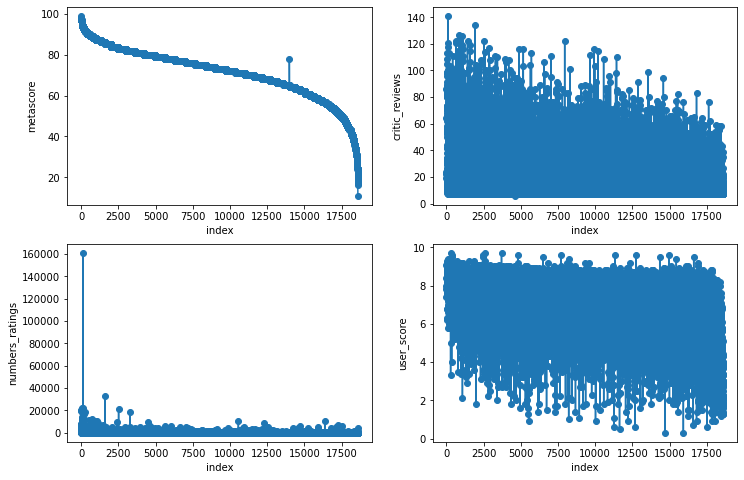

In [52]:
# Creating a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# First figure
ax[0][0].plot(df['metascore'], marker='o')
ax[0][0].set_ylabel('metascore')
ax[0][0].set_xlabel('index')

# Second figure
ax[0][1].plot(df['critic_reviews'], marker='o')
ax[0][1].set_ylabel('critic_reviews')
ax[0][1].set_xlabel('index')

# Third figure
ax[1][0].plot(df['numbers_ratings'],  marker='o')
ax[1][0].set_ylabel('numbers_ratings')
ax[1][0].set_xlabel('index')

# Fourth figure
ax[1][1].plot(df['user_score'], marker='o')
ax[1][1].set_ylabel('user_score')
ax[1][1].set_xlabel('index')

# Other way
'''
plt.show()
for column in columns:
    print(coluna)
    plt.scatter(df.index, df[column])
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()
'''

In [62]:
df_metascore = df.iloc[12500:15000]

df_metascore.loc[df_metascore['metascore'] > 70]

,title,release,plataform,metascore,critic_reviews,user_score,numbers_ratings,developer,genre(s),players_number
13992,STAR WARS: BATTLEFRONT II,10/31/2005,PC,78,23,8.6,615,Pandemic Studios,"Action, Shooter, Shooter, First-Person, Sci-Fi...",Online Multiplayer


In [53]:
df.loc[df['numbers_ratings'] > 20000]

,title,release,plataform,metascore,critic_reviews,user_score,numbers_ratings,developer,genre(s),players_number
16,RED DEAD REDEMPTION 2,10/26/2018,PlayStation 4,97,99,8.7,20079,Rockstar Games,"Action Adventure, Open-World",Up to 32
76,GOD OF WAR,04/20/2018,PlayStation 4,94,118,9.1,22455,SCE Santa Monica,"Action Adventure, Linear",No Online Multiplayer
124,THE WITCHER 3: WILD HUNT,05/18/2015,PC,93,32,9.1,22369,CD Projekt Red Studio,"Action RPG, Role-Playing, Action RPG",No Online Multiplayer
129,THE LAST OF US PART II,06/19/2020,PlayStation 4,93,121,5.8,160678,Naughty Dog,"General, Action Adventure, Survival",No Online Multiplayer
1613,CYBERPUNK 2077,12/10/2020,PC,86,92,7.0,33111,CD Projekt Red Studio,"Action RPG, Role-Playing, Action RPG",No Online Multiplayer
2514,GHOST OF TSUSHIMA,07/17/2020,PlayStation 4,83,122,9.1,21018,Sucker Punch,"General, Action Adventure, Open-World",No Online Multiplayer


In [54]:
# Creating .xlsx file with games data

df.to_excel('gameInfosTreated.xlsx', index=False) 